# Convolution Neural Networks

In [4]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import datasets, layers, models
import numpy as np
import matplotlib.pyplot as plt


train_dir = 'Train'
validation_dir = 'Test'

batch_size = 2
img_size = (64, 64)

#Training Dataset
train_dataset = tf.keras.utils.image_dataset_from_directory(
    train_dir,
    batch_size=batch_size,
    image_size=img_size,
    seed=42
)

#Validation Dataset
validation_dataset = tf.keras.utils.image_dataset_from_directory(
  validation_dir,
  seed=123,
  image_size=img_size,
  batch_size=batch_size
  )

class_names = train_dataset.class_names

model = models.Sequential()
model.add(layers.Conv2D(64, (5,5), activation='relu', input_shape=(64,64,3)))
model.add(layers.AveragePooling2D(2,2))
model.add(layers.Conv2D(48, (5,5), activation='relu'))
model.add(layers.AveragePooling2D((2,2)))
model.add(layers.Conv2D(32, (3,3), activation='relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Flatten())
model.add(layers.Dense(60, activation='relu'))
model.add(layers.Dense(56, activation='relu'))
model.add(layers.Dense(48))
model.add(layers.Dense(24))


model.compile(optimizer='adam', loss=keras.losses.SparseCategoricalCrossentropy(from_logits=True), metrics=['accuracy'])
print(model.summary())
Fitting = model.fit(train_dataset, epochs=5, validation_data=validation_dataset)

test_loss, test_accuracy = model.evaluate(validation_dataset, verbose=2)
print('Test accuracy = ', test_accuracy)


Found 1200 files belonging to 3 classes.
Found 600 files belonging to 3 classes.
Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_9 (Conv2D)           (None, 60, 60, 64)        4864      
                                                                 
 average_pooling2d_6 (Averag  (None, 30, 30, 64)       0         
 ePooling2D)                                                     
                                                                 
 conv2d_10 (Conv2D)          (None, 26, 26, 48)        76848     
                                                                 
 average_pooling2d_7 (Averag  (None, 13, 13, 48)       0         
 ePooling2D)                                                     
                                                                 
 conv2d_11 (Conv2D)          (None, 11, 11, 32)        13856     
                                       

KeyboardInterrupt: 

*Fine Tuning Model*

In [17]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import datasets, layers, models
import numpy as np
import matplotlib.pyplot as plt


train_dir = 'Train'
validation_dir = 'Test'

batch_size = 1
img_size = (64, 64)

# Training Dataset
train_dataset = tf.keras.utils.image_dataset_from_directory(
    train_dir,
    batch_size=batch_size,
    image_size=img_size,
    seed=42
)

# Validation Dataset
validation_dataset = tf.keras.utils.image_dataset_from_directory(
    validation_dir,
    seed=123,
    image_size=img_size,
    batch_size=batch_size
)

class_names = train_dataset.class_names

model = models.Sequential()
model.add(layers.Conv2D(64, (5,5), activation='relu', input_shape=(64,64,3)))
model.add(layers.AveragePooling2D(2,2))
model.add(layers.Conv2D(32, (3,3), activation='relu'))
model.add(layers.AveragePooling2D((2,2)))
model.add(layers.Flatten())
model.add(layers.Dense(104, activation='relu'))
model.add(layers.Dense(76, activation='relu'))
model.add(layers.Dense(38))


model.compile(optimizer='adam', loss=keras.losses.SparseCategoricalCrossentropy(from_logits=True), metrics=['accuracy'])
print(model.summary())

#callbacks
checkpoint = tf.keras.callbacks.ModelCheckpoint("best_model.h5", monitor='val_accuracy', save_best_only=True, mode='max', verbose=1)

history = model.fit(train_dataset,epochs=10, validation_data=validation_dataset, callbacks=[checkpoint])

#best saved model
best_model = tf.keras.models.load_model("best_model.h5")

# Evaluate the best model 
test_loss, test_accuracy = best_model.evaluate(validation_dataset, verbose=2)
print('Test accuracy = ', test_accuracy)


Found 1200 files belonging to 3 classes.
Found 600 files belonging to 3 classes.
Model: "sequential_16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_32 (Conv2D)          (None, 60, 60, 64)        4864      
                                                                 
 average_pooling2d_21 (Avera  (None, 30, 30, 64)       0         
 gePooling2D)                                                    
                                                                 
 conv2d_33 (Conv2D)          (None, 28, 28, 32)        18464     
                                                                 
 average_pooling2d_22 (Avera  (None, 14, 14, 32)       0         
 gePooling2D)                                                    
                                                                 
 flatten_16 (Flatten)        (None, 6272)              0         
                                      

*Evaluate the Model*

In [18]:
import tensorflow as tf
from tensorflow import keras
from sklearn.metrics import classification_report

best_model = tf.keras.models.load_model("best_model.h5")

# Evaluate 
validation_loss, validation_accuracy = best_model.evaluate(validation_dataset, verbose=2)
print('Validation accuracy:', validation_accuracy)

# Get the true labels and predicted labels 
true_labels = []
predicted_labels = []
for images, labels in validation_dataset:
    true_labels.extend(labels.numpy())
    predicted_labels.extend(tf.argmax(best_model.predict(images), axis=-1).numpy())

# Evaluation metrics
report = classification_report(true_labels, predicted_labels)

print("Classification Report:")
print(report)


600/600 - 6s - loss: 1.3937 - accuracy: 0.9317 - 6s/epoch - 11ms/step
Validation accuracy: 0.9316666722297668
1/1 [==============================] - 0s 83ms/step
Classification Report:
              precision    recall  f1-score   support

           0       0.92      1.00      0.96       200
           1       1.00      0.80      0.89       200
           2       0.90      1.00      0.95       200

    accuracy                           0.93       600
   macro avg       0.94      0.93      0.93       600
weighted avg       0.94      0.93      0.93       600



*Sample Predictions*

1/1 [==============================] - 0s 91ms/step


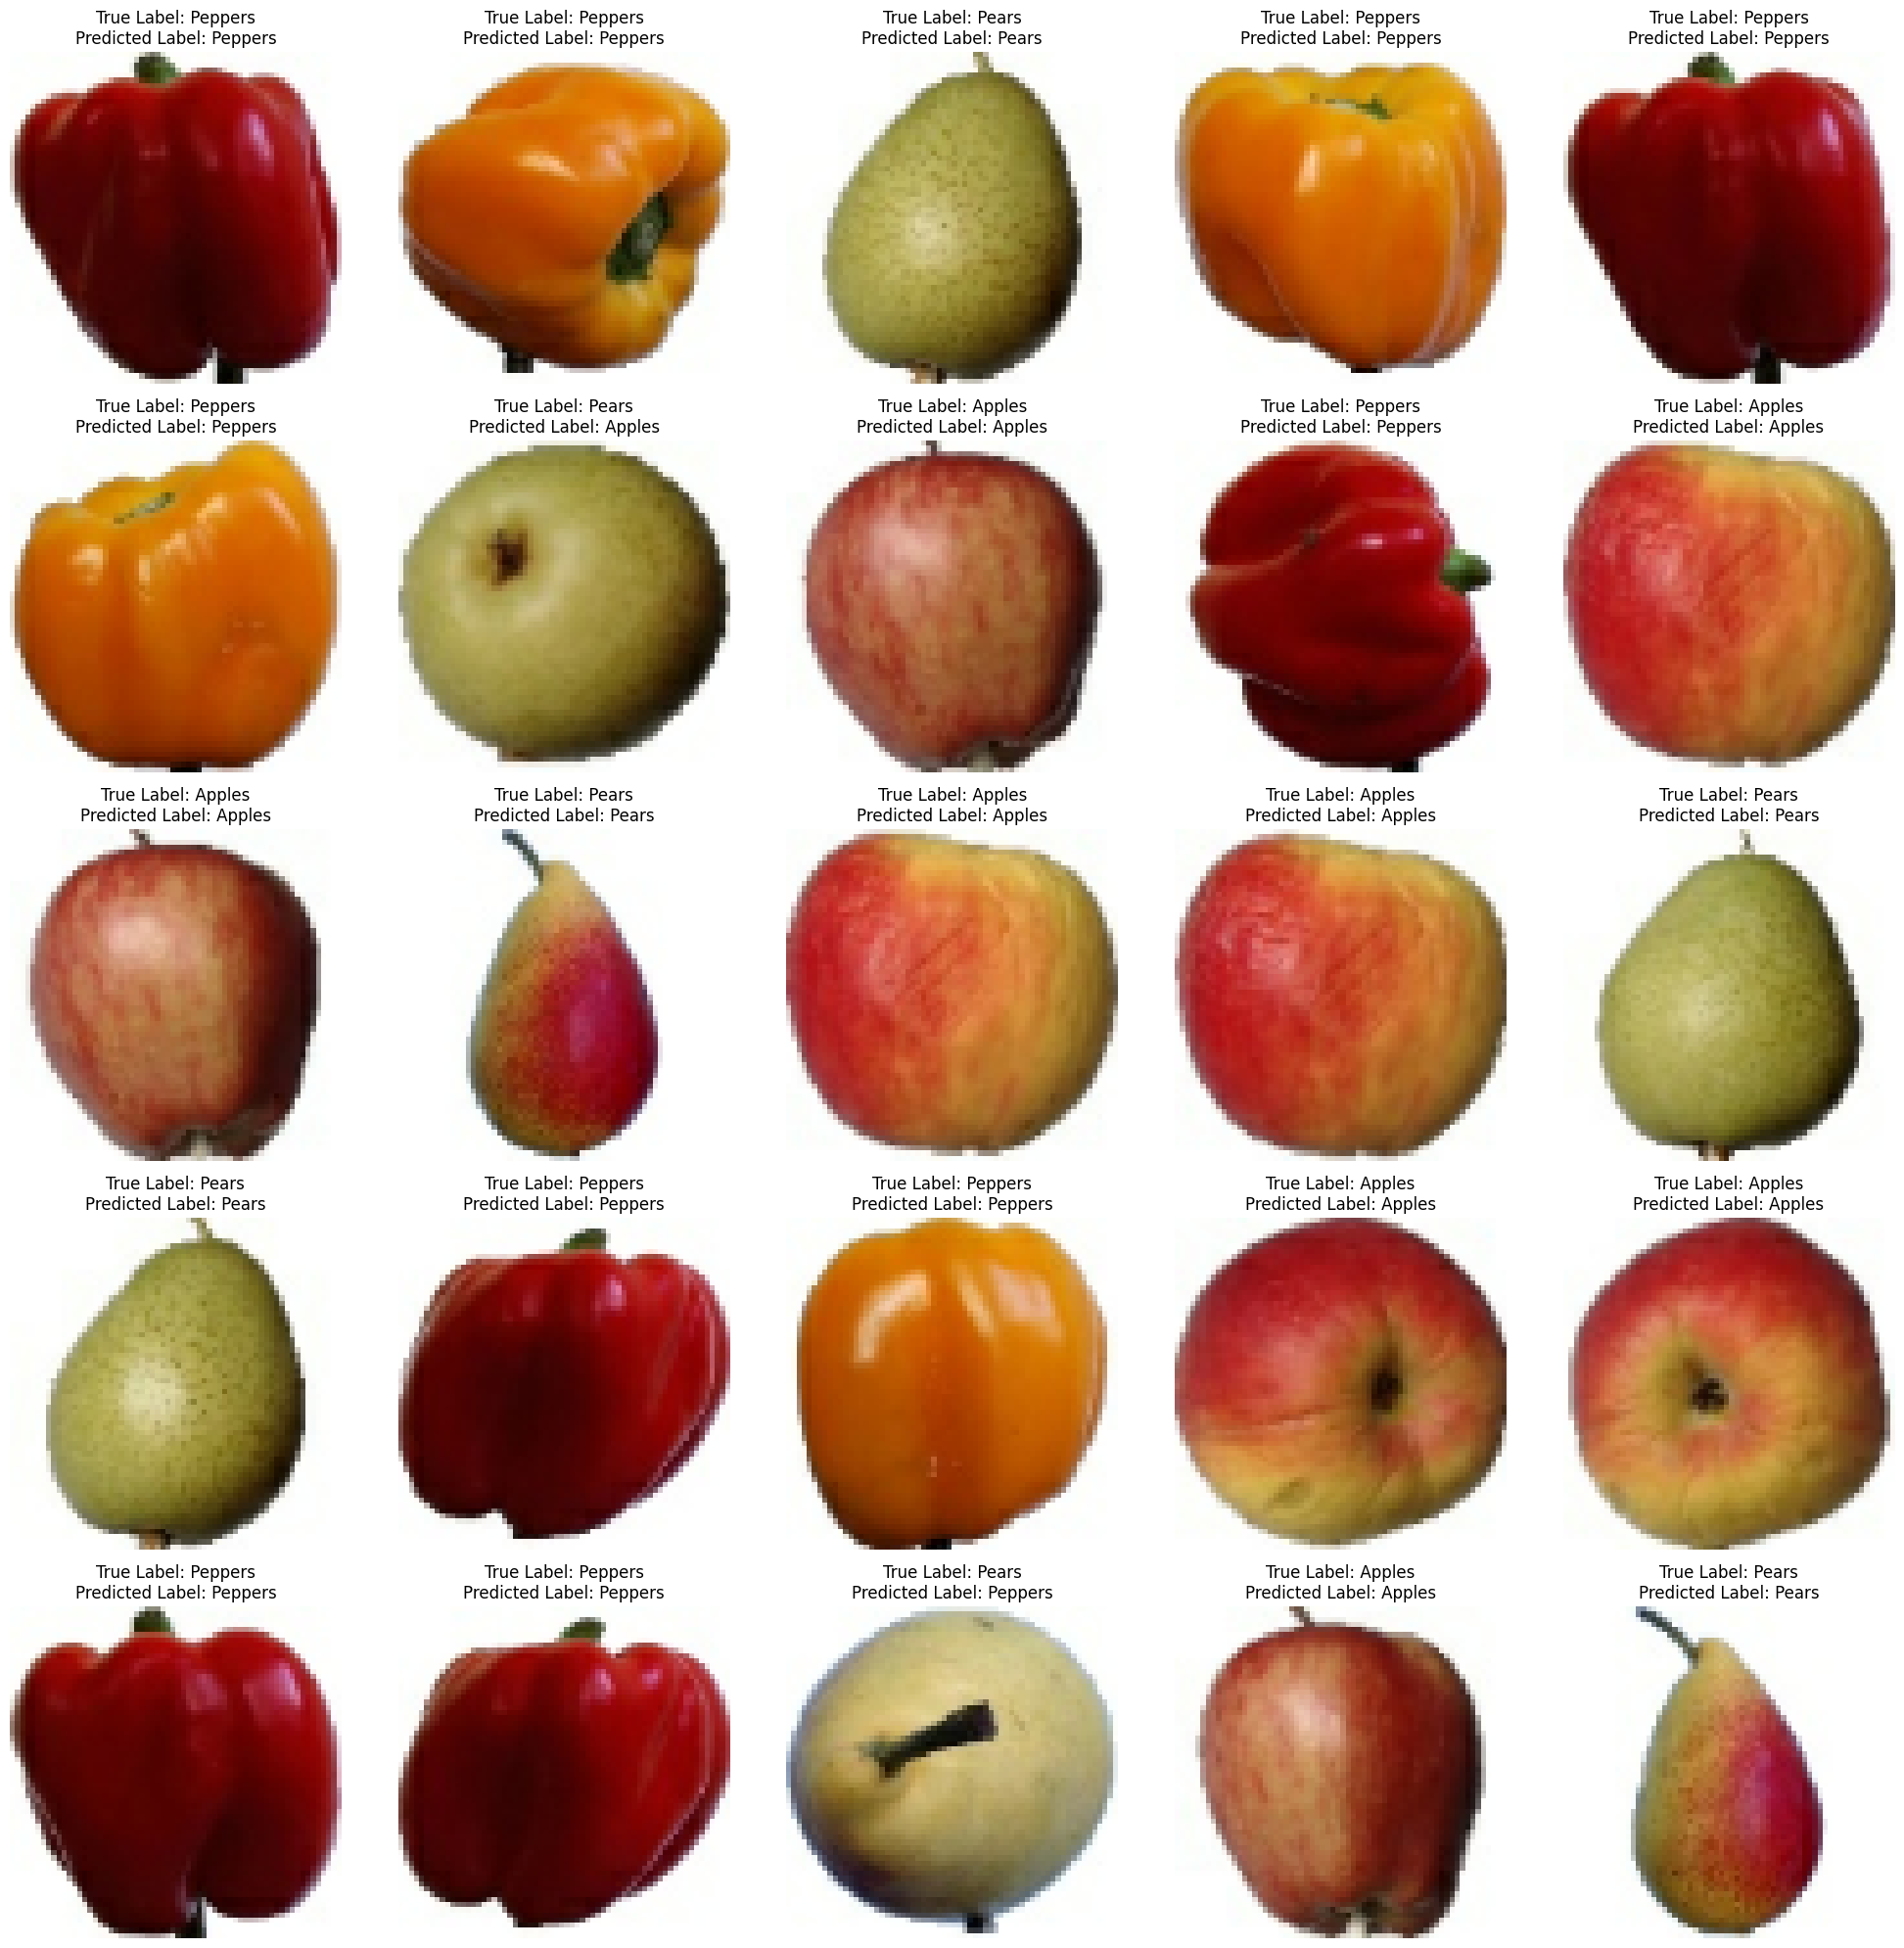

In [28]:
import matplotlib.pyplot as plt

# Samples
num_samples = 25
test_images = []
test_labels = []
for images, labels in validation_dataset.take(num_samples):
    test_images.append(images[0])
    test_labels.append(labels[0].numpy())

# Predicting
predicted_labels = best_model.predict(np.array(test_images))
predicted_labels = tf.argmax(predicted_labels, axis=-1).numpy()

class_names = train_dataset.class_names

# Plotting
plt.figure(figsize=(20, 20))
for i in range(num_samples):
    plt.subplot(5, 5, i+1)
    plt.imshow(test_images[i].numpy().astype("uint8"))
    true_label = class_names[test_labels[i]]
    predicted_label = class_names[predicted_labels[i]]
    plt.title(f"True Label: {true_label}\nPredicted Label: {predicted_label}")
    plt.axis('off')
plt.tight_layout()
plt.show()


*Visualize the training and validation loss and accuracy curves*

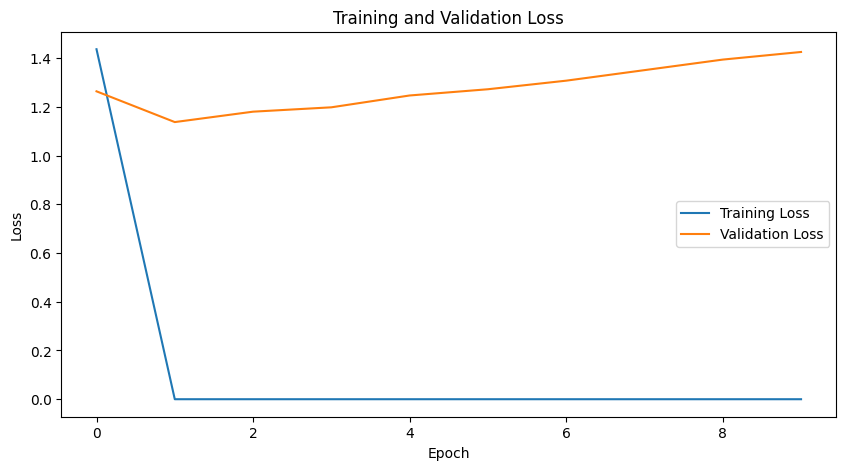

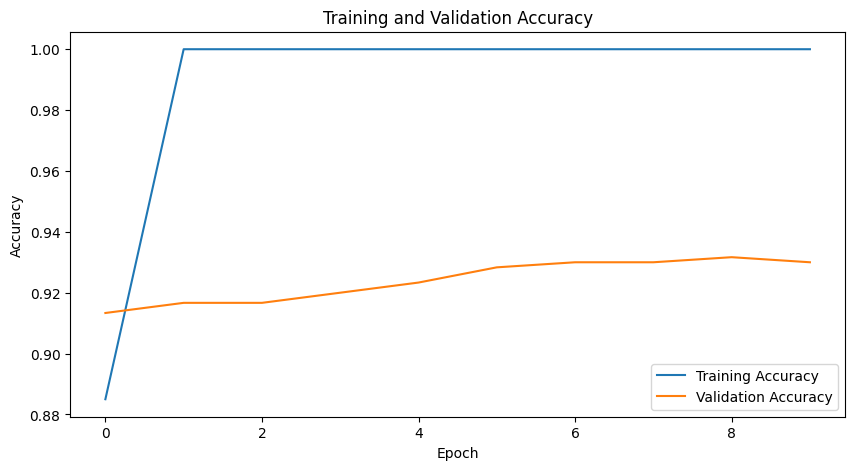

In [22]:
import matplotlib.pyplot as plt

train_loss = history.history['loss']
train_accuracy = history.history['accuracy']
val_loss = history.history['val_loss']
val_accuracy = history.history['val_accuracy']

# Plot loss curves
plt.figure(figsize=(10, 5))
plt.plot(train_loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Plot accuracy curves
plt.figure(figsize=(10, 5))
plt.plot(train_accuracy, label='Training Accuracy')
plt.plot(val_accuracy, label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


In [2]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import datasets, layers, models
import numpy as np
import matplotlib.pyplot as plt


train_dir = 'Train'
validation_dir = 'Test'

batch_size = 1
img_size = (28, 28)

#Training Dataset
train_dataset = tf.keras.utils.image_dataset_from_directory(
    train_dir,
    batch_size=batch_size,
    image_size=img_size,
    seed=42
)

#Validation Dataset
validation_dataset = tf.keras.utils.image_dataset_from_directory(
  validation_dir,
  seed=123,
  image_size=img_size,
  batch_size=batch_size
  )

class_names = train_dataset.class_names

model = models.Sequential()
model.add(layers.Conv2D(6, (5,5), activation='relu', input_shape=(28,28,3)))
model.add(layers.AveragePooling2D(2,2))
model.add(layers.Conv2D(16, (3,3), activation='relu'))
model.add(layers.AveragePooling2D((2,2)))
model.add(layers.Flatten())
model.add(layers.Dense(120, activation='relu'))
model.add(layers.Dense(10, activation='relu'))


model.compile(optimizer='adam', loss=keras.losses.SparseCategoricalCrossentropy(from_logits=True), metrics=['accuracy'])
print(model.summary())
Fitting = model.fit(train_dataset, epochs=5, validation_data=validation_dataset)

test_loss, test_accuracy = model.evaluate(validation_dataset, verbose=2)
print('Test accuracy = ', test_accuracy)


Found 1200 files belonging to 3 classes.
Found 600 files belonging to 3 classes.
Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 24, 24, 6)         456       
                                                                 
 average_pooling2d_2 (Averag  (None, 12, 12, 6)        0         
 ePooling2D)                                                     
                                                                 
 conv2d_3 (Conv2D)           (None, 10, 10, 16)        880       
                                                                 
 average_pooling2d_3 (Averag  (None, 5, 5, 16)         0         
 ePooling2D)                                                     
                                                                 
 flatten_1 (Flatten)         (None, 400)               0         
                                       